<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, kstest, cramervonmises
import matplotlib.pyplot as plt

# Генерим выборки из разных распределений

In [34]:
sample_sizes = [10, 50, 100, 150, 200, 500, 1000]  # Размерность выборок
N = 10 ** 3  # Число выборок
alpha = 0.05 # Уровень значимости
z_critical = stats.norm.ppf(1 - alpha / 2) # z-статистика
print(f'Z-critical: {z_critical}')

Z-critical: 1.959963984540054


In [35]:
"""НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ"""
"""РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ"""
"""ЭКСПОНЕНТА"""

samples = {
    "normal_distribution": {
        values: [] for values in sample_sizes
    },
    "uniform_distribution": {
        values: [] for values in sample_sizes
    },
    "exponential_distribution": {
        values: [] for values in sample_sizes
    }
}

for value in sample_sizes:
    samples["normal_distribution"][value] = [np.random.normal(0, 1, value) for _ in range(N)]
    samples["uniform_distribution"][value] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), value) for _ in range(N)]
    samples["exponential_distribution"][value] = [np.random.exponential(1, value) - 1 for _ in range(N)]

# Проверка гипотезы о принадлежности выборки к определенному распределению через ks-test, cramervonmises


H0: Выборка данных получена из заданного распределения

Экспоненциальное распределение - “экзотика”, и тесты чаще отклоняют нулевую гипотезу, даже если выборка была из этого распределения.

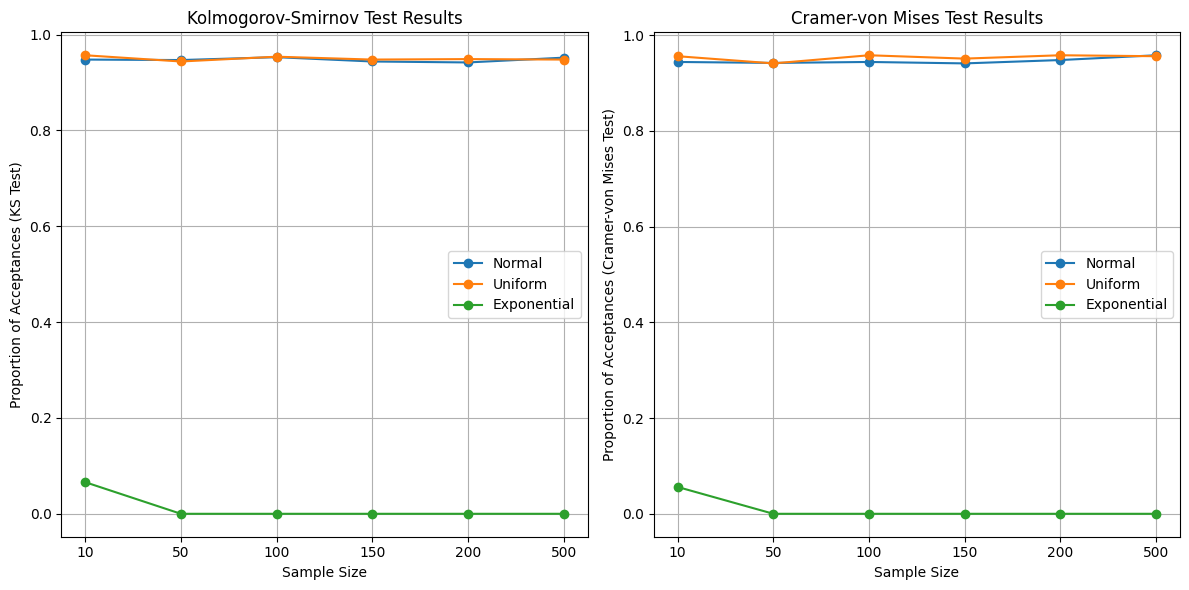

In [36]:
sample_sizes = [10, 50, 100, 150, 200, 500]  # Размерность выборок
N = 10 ** 3  # Число выборок
alpha = 0.05  # Уровень значимости

# Подготовка хранения результатов
results = {
    "normal_distribution": {
        "ks": [],
        "cm": []
    },
    "uniform_distribution": {
        "ks": [],
        "cm": []
    },
    "exponential_distribution": {
        "ks": [],
        "cm": []
    }
}

# Генерация выборок
for size in sample_sizes:
    # Генерация выборок
    normal_samples = [np.random.normal(0, 1, size) for _ in range(N)]
    uniform_samples = [np.random.uniform(-np.sqrt(3), np.sqrt(3), size) for _ in range(N)]
    exponential_samples = [np.random.exponential(1, size) - 1 for _ in range(N)]

    # Проверка гипотезы для нормального распределения
    ks_results_normal = [stats.kstest(sample, 'norm', args=(0, 1)).pvalue for sample in normal_samples]
    cm_results_normal = [stats.cramervonmises(sample, 'norm', args=(0, 1)).pvalue for sample in normal_samples]

    # Проверка гипотезы для равномерного распределения
    ks_results_uniform = [stats.kstest(sample, 'uniform', args=(-np.sqrt(3), 2 * np.sqrt(3))).pvalue for sample in uniform_samples]
    cm_results_uniform = [stats.cramervonmises(sample, 'uniform', args=(-np.sqrt(3), 2 * np.sqrt(3))).pvalue for sample in uniform_samples]

    # Проверка гипотезы для экспоненциального распределения
    ks_results_exponential = [stats.kstest(sample, 'expon', args=(0, 1)).pvalue for sample in exponential_samples]
    cm_results_exponential = [stats.cramervonmises(sample, 'expon', args=(0, 1)).pvalue for sample in exponential_samples]

    # Сохранение результатов
    results["normal_distribution"]["ks"].append((np.array(ks_results_normal) > alpha).mean())
    results["normal_distribution"]["cm"].append((np.array(cm_results_normal) > alpha).mean())
    results["uniform_distribution"]["ks"].append((np.array(ks_results_uniform) > alpha).mean())
    results["uniform_distribution"]["cm"].append((np.array(cm_results_uniform) > alpha).mean())
    results["exponential_distribution"]["ks"].append((np.array(ks_results_exponential) > alpha).mean())
    results["exponential_distribution"]["cm"].append((np.array(cm_results_exponential) > alpha).mean())

# Визуализация результатов
x = np.arange(len(sample_sizes))

plt.figure(figsize=(12, 6))

# Критерий Колмогорова-Смирнова
plt.subplot(1, 2, 1)
plt.plot(x, results["normal_distribution"]["ks"], marker='o', label='Normal')
plt.plot(x, results["uniform_distribution"]["ks"], marker='o', label='Uniform')
plt.plot(x, results["exponential_distribution"]["ks"], marker='o', label='Exponential')
plt.xticks(x, sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Proportion of Acceptances (KS Test)')
plt.title('Kolmogorov-Smirnov Test Results')
plt.legend()
plt.grid()

# Критерий Мизеса-фон Крамера
plt.subplot(1, 2, 2)
plt.plot(x, results["normal_distribution"]["cm"], marker='o', label='Normal')
plt.plot(x, results["uniform_distribution"]["cm"], marker='o', label='Uniform')
plt.plot(x, results["exponential_distribution"]["cm"], marker='o', label='Exponential')
plt.xticks(x, sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Proportion of Acceptances (Cramer-von Mises Test)')
plt.title('Cramer-von Mises Test Results')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [39]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [40]:
alpha = 0.05
sample_sizes = [10, 50, 100, 150, 200, 500, 600, 800, 1000]
num_samples = 1000
distributions = {
    "normal": lambda n: np.random.normal(0, 1, n),
    "uniform": lambda n: np.random.uniform(-np.sqrt(3), np.sqrt(3), n),
    "exponential": lambda n: np.random.exponential(1, n) - 1
}

In [41]:
def add_noise(samples, d):
    return samples + np.random.uniform(-d, d, samples.shape)

def testing(samples, dist_name):
    if dist_name == "normal":
        cdf = stats.norm.cdf
    elif dist_name == "uniform":
        cdf = stats.uniform(loc=-np.sqrt(3), scale=2 * np.sqrt(3)).cdf
    elif dist_name == "exponential":
        cdf = stats.expon(loc=-1, scale=1).cdf

    ks_stat, ks_p = stats.kstest(samples, cdf)
    return ks_p < alpha

In [42]:
results = {dist: {n: [] for n in sample_sizes} for dist in distributions}

for dist_name, generator in distributions.items():
    for n in sample_sizes:
        for _ in range(num_samples):
            sample = generator(n)
            rejected = testing(sample, dist_name)
            results[dist_name][n].append(rejected)

1. На малых значениях n (например, слева на графике), мы видим, что реальное α* может заметно колебаться (отклоняться от уровня 0.05) для всех трех распределений.

2. По мере увеличения n, значения α* становятся более устойчивыми и ближе к уровню 0.05. Это происходит из-за того, что с увеличением размера выборки наши оценки становятся более точными.

3. Для равномерного и экспоненциального распределений значения α* могут отклонятся от 0.05 немного больше, чем для нормального распределения, что может означать, что эти тесты более “капризны” в этих случаях.

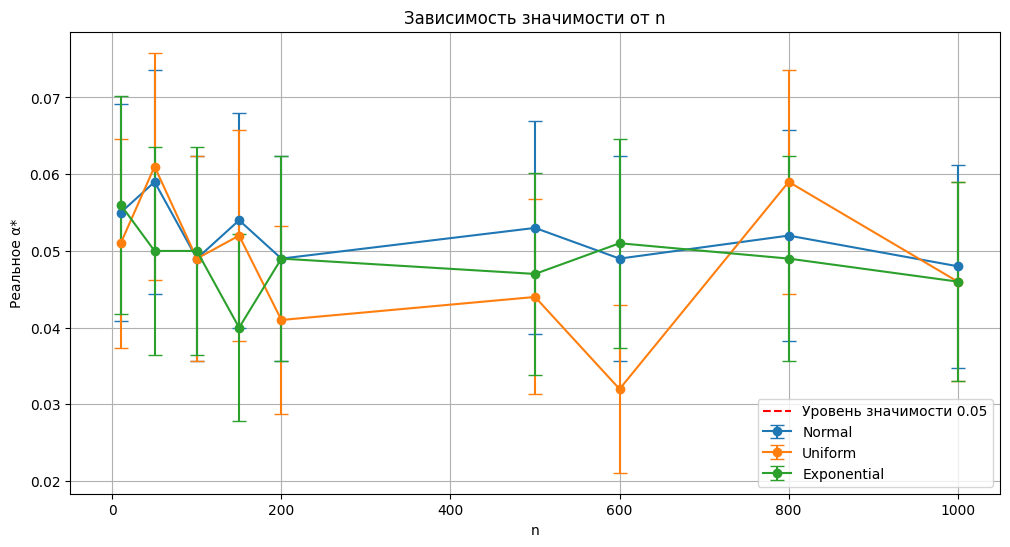

In [43]:
alpha_star = {
    dist_name: {n: np.mean(results[dist_name][n]) for n in sample_sizes}
    for dist_name in distributions
}

plt.figure(figsize=(12, 6))
for dist_name, alpha_values in alpha_star.items():
    x = list(alpha_values.keys())
    y = list(alpha_values.values())
    ci = [1.96 * np.sqrt(alpha * (1 - alpha) / num_samples) for alpha in y]

    plt.errorbar(x, y, yerr=ci, label=f"{dist_name.capitalize()}", capsize=5, fmt='o-')

plt.plot(alpha, color='red', linestyle='--', label=f"Уровень значимости {alpha}")
plt.xlabel("n")
plt.ylabel("Реальное α*")
plt.title("Зависимость значимости от n")
plt.legend()
plt.grid()
plt.show()

In [32]:
d_values = np.arange(0.1, 1.1, 0.1)
alpha_star_with_noise = {
    dist_name: {d: {n: [] for n in sample_sizes} for d in d_values}
    for dist_name in distributions
}

for dist_name, generator in distributions.items():
    for d in d_values:
        for n in sample_sizes:
            for _ in range(num_samples):
                sample = add_noise(generator(n), d)
                rejected = testing(sample, dist_name)
                alpha_star_with_noise[dist_name][d][n].append(rejected)

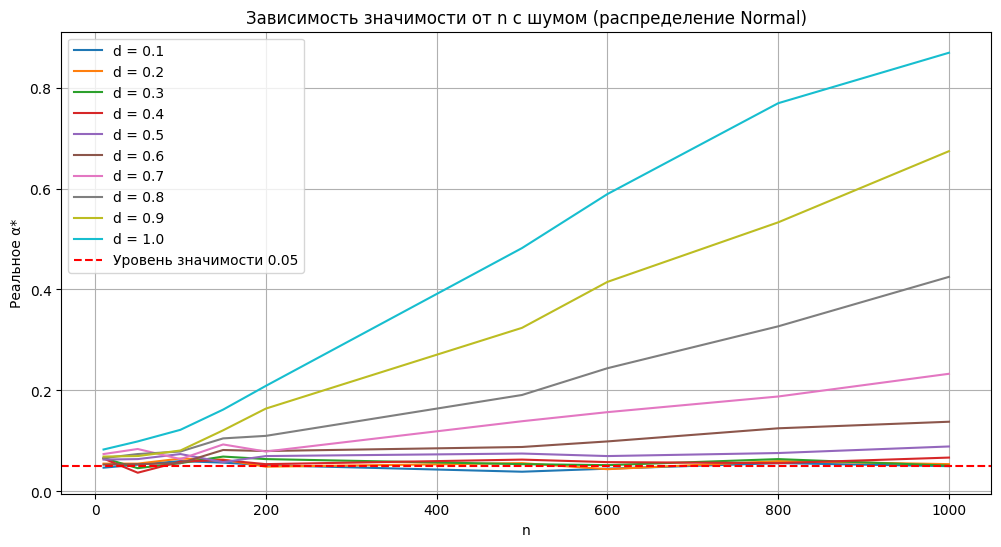

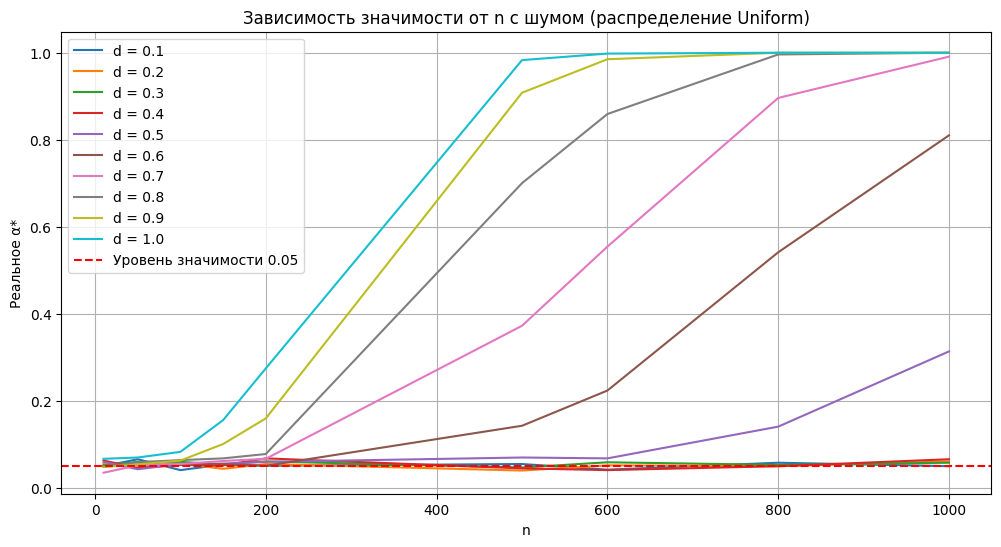

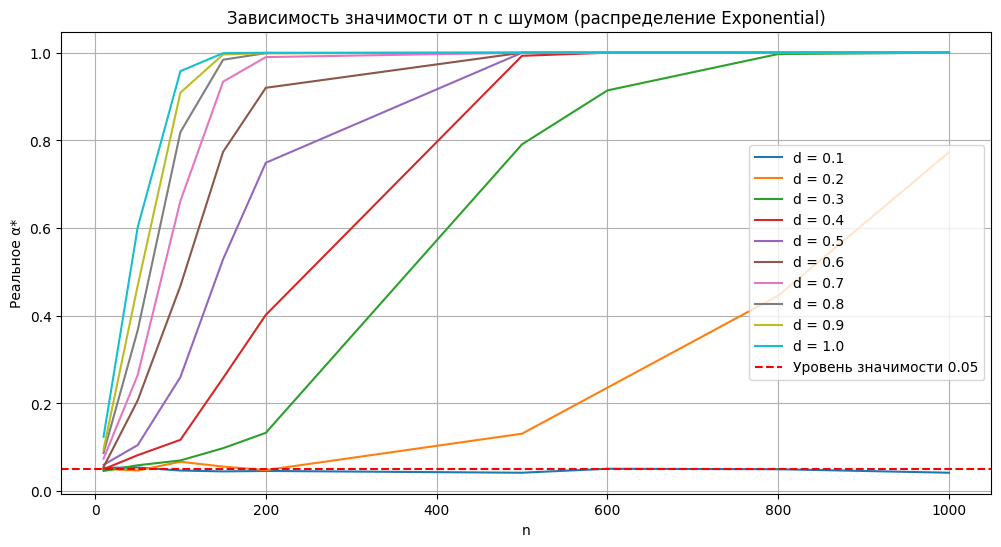

In [33]:
for dist_name in distributions:
    plt.figure(figsize=(12, 6))
    for d in d_values:
        x = sample_sizes
        y = [np.mean(alpha_star_with_noise[dist_name][d][n]) for n in sample_sizes]
        plt.plot(x, y, label=f"d = {d:.1f}")

    plt.axhline(y=alpha, color='red', linestyle='--', label=f"Уровень значимости {alpha}")
    plt.xlabel("n")
    plt.ylabel("Реальное α*")
    plt.title(f"Зависимость значимости от n с шумом (распределение {dist_name.capitalize()})")
    plt.legend()
    plt.grid()
    plt.show()